In [1]:
#Importing dependancies to manipulate data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Prepare The Data
### First, read and clean several CSV files for analysis. The CSV files include whale portfolio returns, algorithmic trading portfolio returns, and S&P TSX 60 Index historical prices. Use the starter code to complete the following steps:

In [2]:
#Read the csv files as data frames

algo_df = pd.read_csv('algo_returns.csv')
tsx_df = pd.read_csv('sp_tsx_history.csv')
whale_df = pd.read_csv('whale_returns.csv')

### Clean The Whale_df Data

In [3]:
#Read the Whale Portfolio daily returns and clean the data.

#Read Whale Returns
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
#Rename the Paulson & Co column to get rid of the ampersand
#whale_df.columns[2]
whale_df.rename(
    columns={whale_df.columns[2]:"PAULSON_AND_CO",}
          ,inplace=True)

In [5]:
#Check datatype
whale_df.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON_AND_CO                 float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [6]:
#change the date to date_time format
whale_df['Date']= pd.to_datetime(whale_df['Date'])

In [7]:
#sort by date
whale_df.sort_index(ascending=True)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON_AND_CO,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [8]:
#Count Whale Nuls
whale_df.isna().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON_AND_CO                 1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [9]:
#Drop missing values in Whale
whale_df = whale_df.dropna()

In [10]:
#check if missing values are present
whale_df.isna().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON_AND_CO                 0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

### Clean The Algo_df Data

In [11]:
#Read the algorithmic daily returns and clean the data. 

#Reading algorithmic returns
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [12]:
#Check datatype
algo_df.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [13]:
#change the date to date_time format
algo_df['Date']= pd.to_datetime(algo_df['Date'])

In [14]:
#sort by date
algo_df.sort_index(ascending=True)

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [15]:
#Count Algo Nuls
algo_df.isna().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [16]:
#Drop missing values in algo
algo_df = algo_df.dropna()

In [17]:
#check if missing values are present
algo_df.isna().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

### Clean the S&P TSX Data

In [18]:
# Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data.

# Reading S&P TSX 60 Closing Prices

tsx_df.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [19]:
 # Check Data Types
tsx_df.dtypes

Date     object
Close    object
dtype: object

In [20]:
# Convert date to date_time format

tsx_df['Date']= pd.to_datetime(tsx_df['Date'])

In [21]:
#sort by date
tsx_df.sort_index(ascending=True)

,Date,Close
0,2012-10-01,"$12,370.19"
1,2012-10-02,"$12,391.23"
2,2012-10-03,"$12,359.47"
3,2012-10-04,"$12,447.68"
4,2012-10-05,"$12,418.99"
...,...,...
1813,2019-12-20,"$17,118.44"
1814,2019-12-23,"$17,128.71"
1815,2019-12-24,"$17,180.15"
1816,2019-12-27,"$17,168.21"


In [22]:
#remove commas
tsx_df['Close'] = tsx_df['Close'].str.replace(',', '')

In [23]:
#remove dollar signs
tsx_df['Close'] = tsx_df['Close'].str.replace('$', '')

C:\Users\Rog\AppData\Local\Temp/ipykernel_268/3812215780.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tsx_df['Close'] = tsx_df['Close'].str.replace('$', '')


In [24]:
#Convert close to a string and then an integer
tsx_df['Close'] = tsx_df['Close'].astype(float)

In [25]:
tsx_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [26]:
 # Calculate Daily Returns
daily_returns = tsx_df['Close'].pct_change()
daily_returns.head()

0         NaN
1    0.001701
2   -0.002563
3    0.007137
4   -0.002305
Name: Close, dtype: float64

In [27]:
#Create a new column with daily_returns as the title
tsx_df['TSX Returns'] = daily_returns

In [28]:
tsx_df.head()

,Date,Close,TSX Returns
0,2012-10-01,12370.19,NaN
1,2012-10-02,12391.23,0.001701
2,2012-10-03,12359.47,-0.002563
3,2012-10-04,12447.68,0.007137
4,2012-10-05,12418.99,-0.002305


In [29]:
#identify null values
tsx_df.isna().sum()

Date           0
Close          0
TSX Returns    1
dtype: int64

In [30]:
#Drop null values
tsx_df = tsx_df.dropna()

In [31]:
#Check to see if there are null values
tsx_df.isna().sum()

Date           0
Close          0
TSX Returns    0
dtype: int64

In [32]:
#Drop the close column
tsx_df.drop('Close', axis=1, inplace=True)

In [33]:
#see the manipulated data frame
tsx_df.head()

,Date,TSX Returns
1,2012-10-02,0.001701
2,2012-10-03,-0.002563
3,2012-10-04,0.007137
4,2012-10-05,-0.002305
5,2012-10-09,-0.011709


# Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [34]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

#First, see what each dataframe looks like
tsx_df.head()
whale_df.head()
algo_df.head()

#Each column has a unique name so it will not have to be modified further.

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


In [35]:
#Join algo, tsx, and whale dataframes based on the date.

#First, set each dataframe to have date as the index.
whale_df = whale_df.set_index('Date')
algo_df = algo_df.set_index('Date')
tsx_df = tsx_df.set_index('Date')



In [36]:
#Join whale & algo dataframes
whale_algo = whale_df.join(algo_df, how ='right')

In [37]:
#Join whale_algo with tsx_df
all_data = whale_algo.join(tsx_df, how ='right')

In [38]:
#Check for null values
all_data.isna().sum()
#From the output, we can see that the tsx returns has the least number of arguements that we can analyze. 
#To conduct equal financial analysis on each portfolio, we should delete the null values to have an equal sample size for each portfolio.
all_data = all_data.dropna()

In [39]:
all_data.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON_AND_CO                 0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
TSX Returns                    0
dtype: int64

In [40]:
all_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON_AND_CO,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


# Conduct Quantitative Analysis
### Calculate and visualize performance and risk metrics for the portfolios.

### Performance Anlysis

<AxesSubplot:xlabel='Date'>

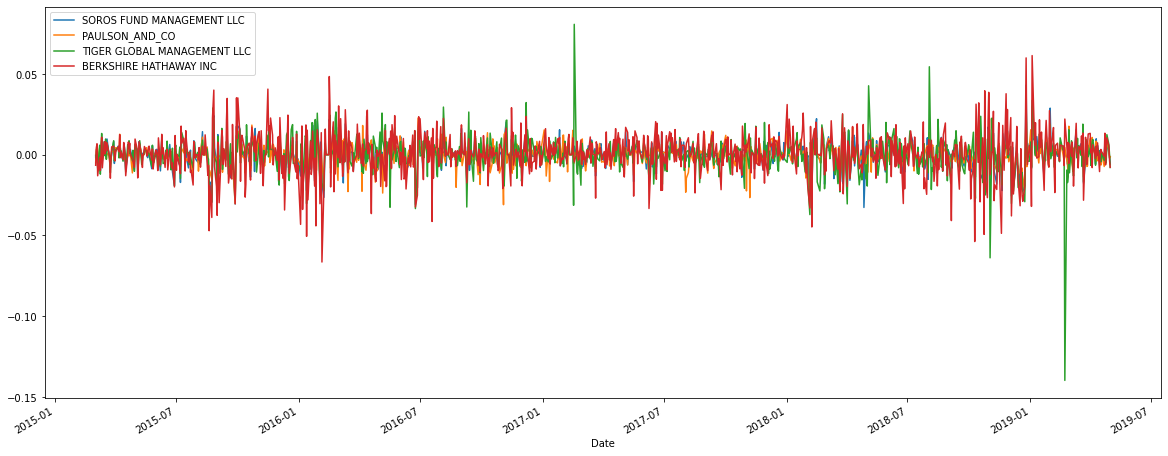

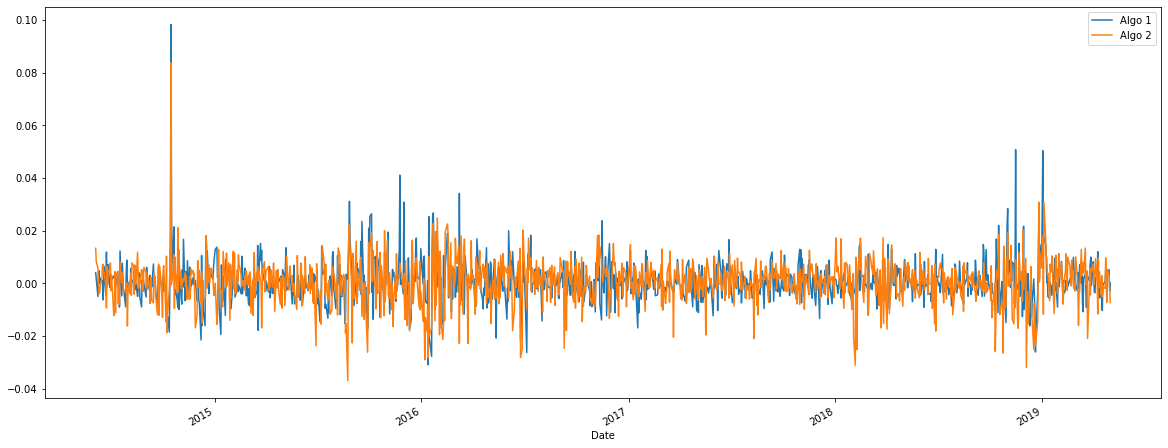

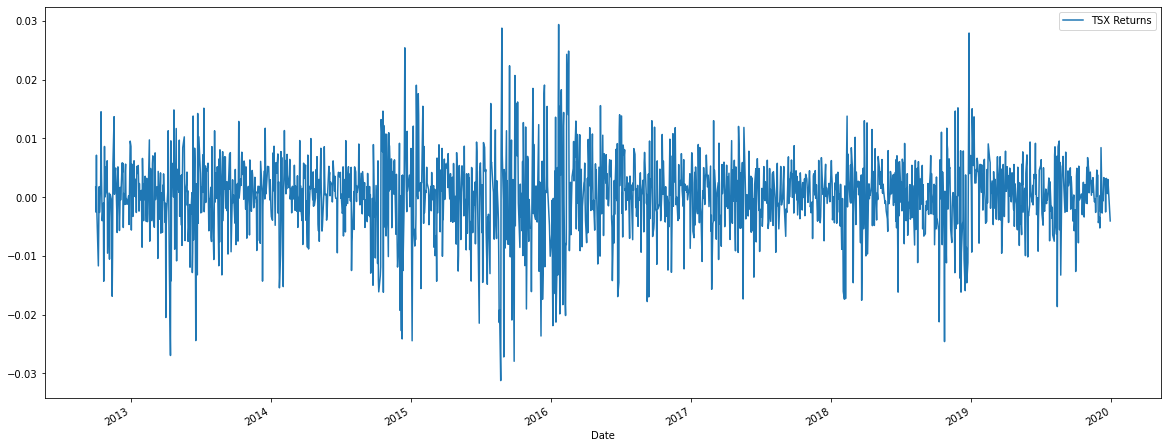

In [41]:
#Plot daily returns of all portfolios
whale_df.plot(figsize=(20,8))
algo_df.plot(figsize=(20,8))
tsx_df.plot(figsize=(20,8))

<AxesSubplot:xlabel='Date'>

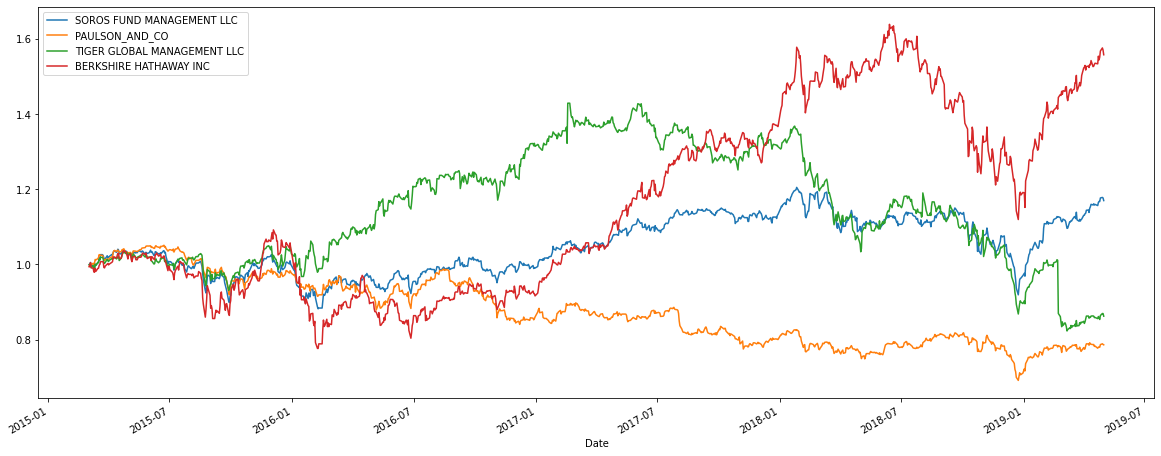

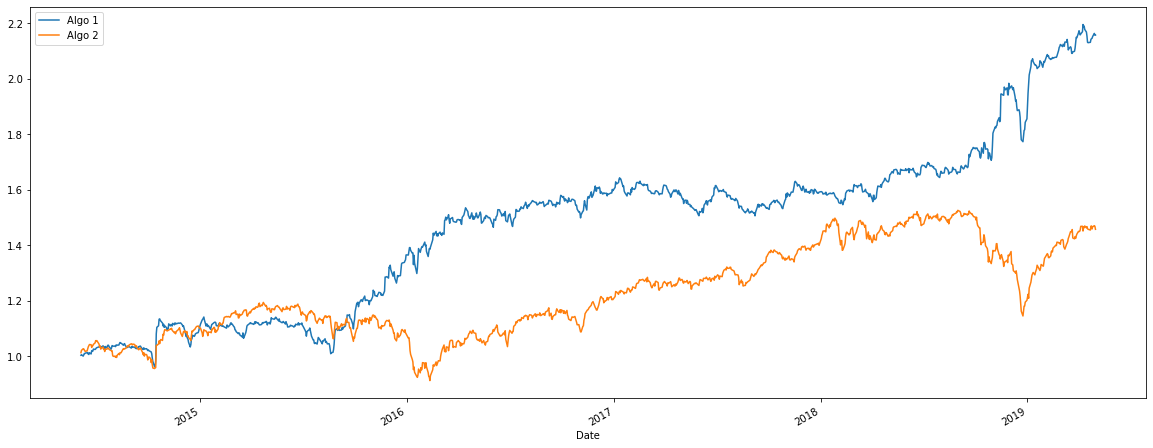

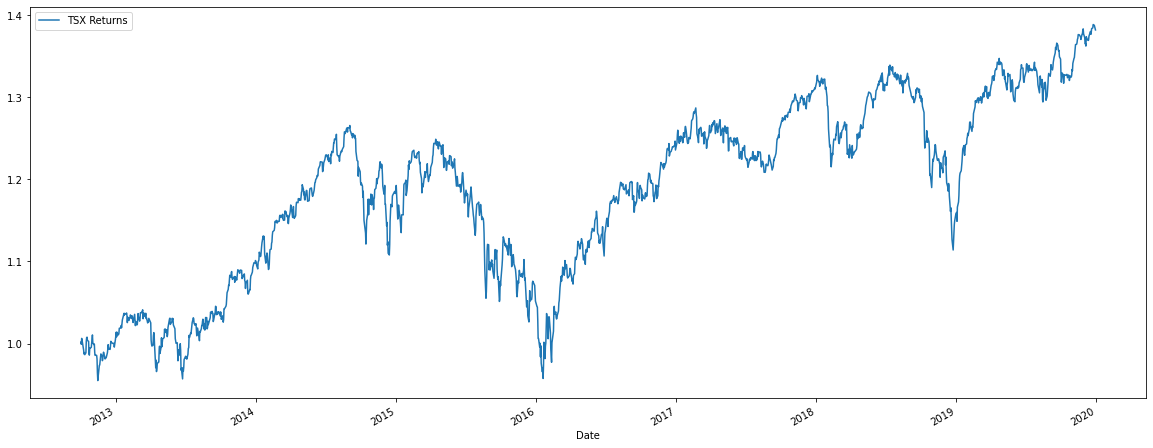

In [42]:
# Calculate cumulative returns of all portfolios
whale_cumulative_returns_df = (1 + whale_df).cumprod()
algo_cumulative_returns_df = (1 + algo_df).cumprod()
tsx_cumulative_returns_df = (1 + tsx_df).cumprod()

# Plot cumulative returns
whale_cumulative_returns_df.plot(figsize =(20,8))
algo_cumulative_returns_df.plot(figsize =(20,8))
tsx_cumulative_returns_df.plot(figsize =(20,8))

In [43]:
# It appears that Berkshire Hathaway and Trading Algorithm 1 both beat the TSX daily returns. Trading algorithm is just about equal to the TSX.

# Risk Analysis
### Determine the risk of each portfolio:
###     Create a box plot for each portfolio. 
###     Calculate the standard deviation for all portfolios.
###     Determine which portfolios are riskier than the S&P TSX 60.
###     Calculate the Annualized Standard Deviation.

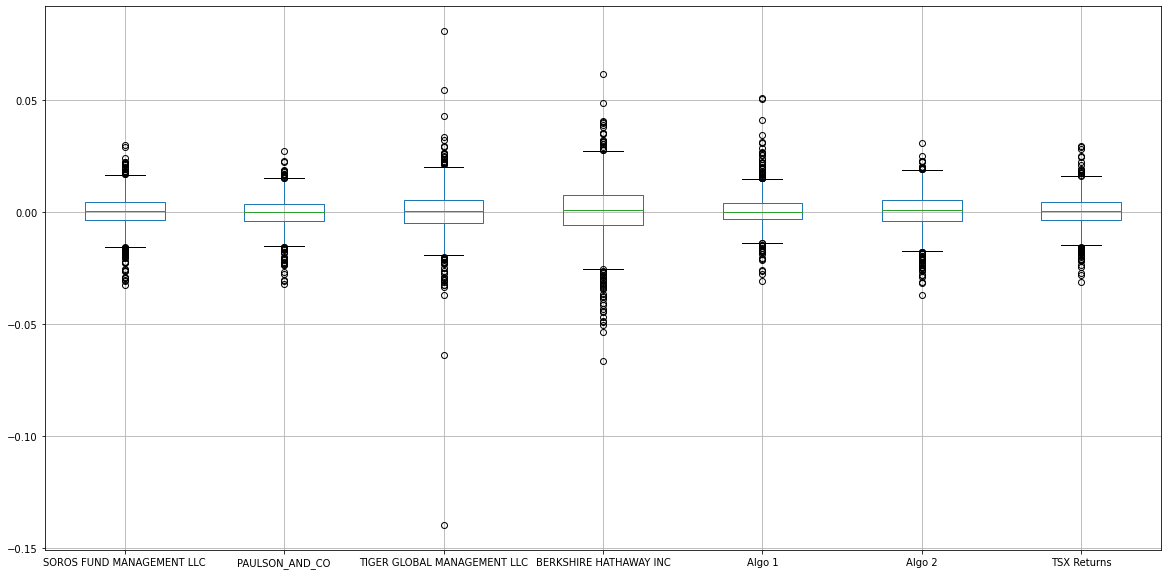

In [44]:
#Create a boxplot for each of the returns.
boxplot = all_data.boxplot(
    column=['SOROS FUND MANAGEMENT LLC', 'PAULSON_AND_CO', 'TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','TSX Returns'],
    figsize=(20,10))

In [45]:
#Determining the risk of each Whale Portfolio
#Risk is seen as the volatility of a portfolio. Volatility is a defined as the annualized measure of the standard deviation of said portfolio.
#First, find standard deviation
soros_std = whale_df['SOROS FUND MANAGEMENT LLC'].std()
paulson_std = whale_df['PAULSON_AND_CO'].std()
tiger_std = whale_df['TIGER GLOBAL MANAGEMENT LLC'].std()
berkshire_std = whale_df['BERKSHIRE HATHAWAY INC'].std()
algo_1_std = algo_df['Algo 1'].std()
algo_2_std = algo_df['Algo 2'].std()
tsx_std = tsx_df['TSX Returns'].std()

#Next, annualize the standard deviation to find volatility.
#volatility is equal to the square root of the standard deviation of the daily returns multiplied by the number of trading days per year.
#volatility = std(daily reutrns)*252**.5
soros_vol = soros_std*252**.5
paulson_vol = paulson_std*252**.5
tiger_vol = tiger_std*252**.5
berkshire_vol = berkshire_std*252**.5
algo_1_vol = algo_1_std*252**.5
algo_2_vol = algo_2_std*252**.5
tsx_vol = tsx_std*252**.5
print(soros_vol, paulson_vol, tiger_vol, berkshire_vol,algo_1_vol,algo_2_vol,tsx_vol)

0.12448731354980655 0.11075440057593401 0.17183018551589085 0.20368211940022282 0.12680100939038405 0.13440092036178766 0.10536486411828129


In [46]:
#Determine which portfolios are riskier than the TSX
print(f'The Risk of Each Portfolio In Order From Riskies To Least Risky Is')
print(f'------------------------------------------------------------------')
print(f'Berkshire Hathaway - 0.204')
print(f'Tiger Global Management - 0.172')
print(f'Trading Algorithm 2 - 0.134')
print(f'Trading Algorithm 1 - 0.127')
print(f'Soros Fund Management - 0.124')
print(f'Paulson & Co. Inc. - 0.111')
print(f'TSX - 0.105')
print(f'Therefore, all of the portfolios are more volatile and risky than the TSX')

The Risk of Each Portfolio In Order From Riskies To Least Risky Is
------------------------------------------------------------------
Berkshire Hathaway - 0.204
Tiger Global Management - 0.172
Trading Algorithm 2 - 0.134
Trading Algorithm 1 - 0.127
Soros Fund Management - 0.124
Paulson & Co. Inc. - 0.111
TSX - 0.105
Therefore, all of the portfolios are more volatile and risky than the TSX


### Rolling Statistics

<AxesSubplot:xlabel='Date'>

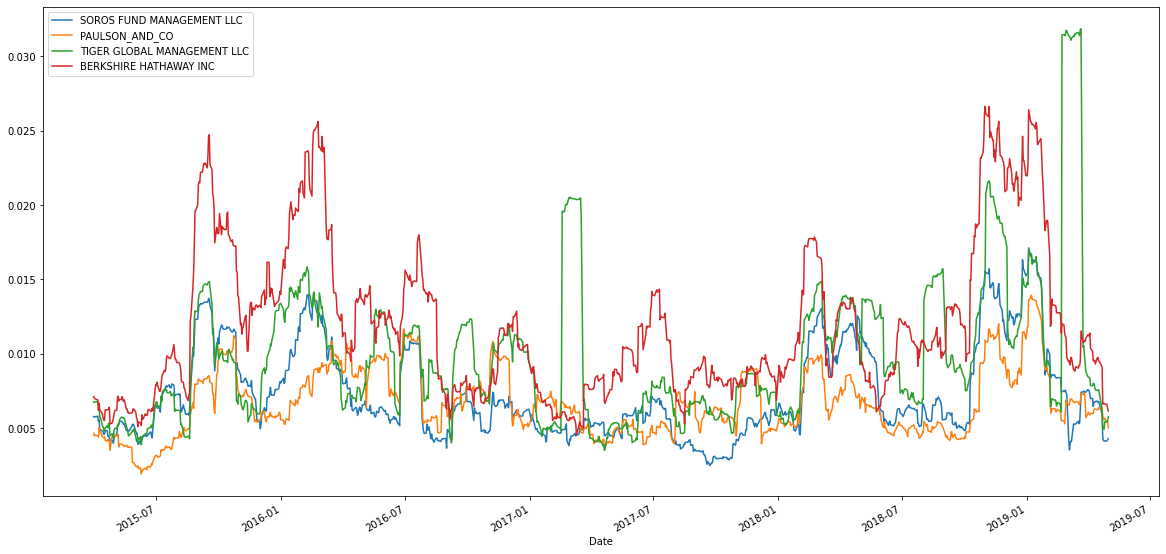

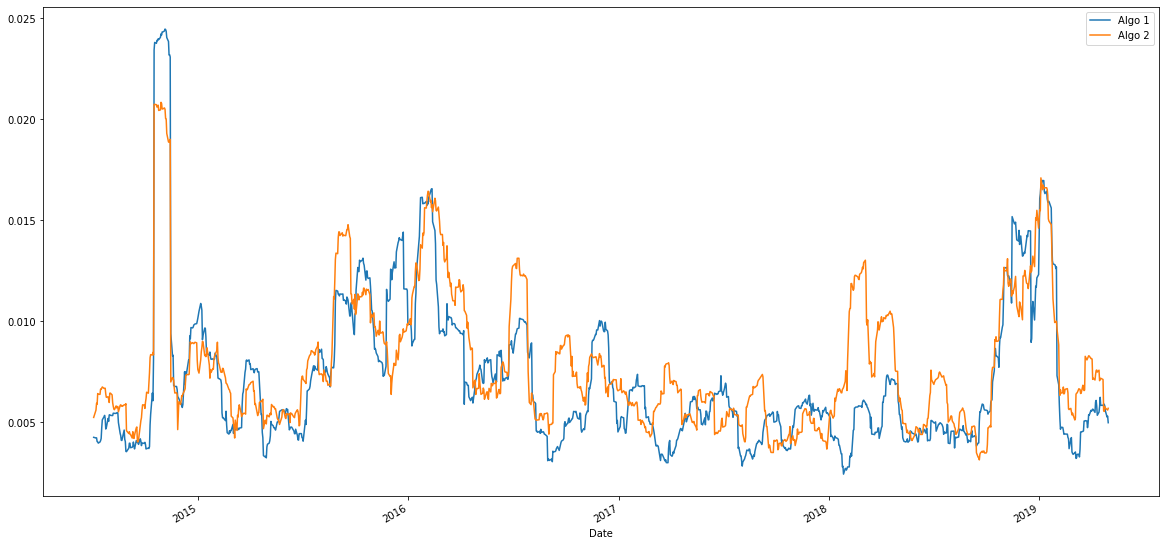

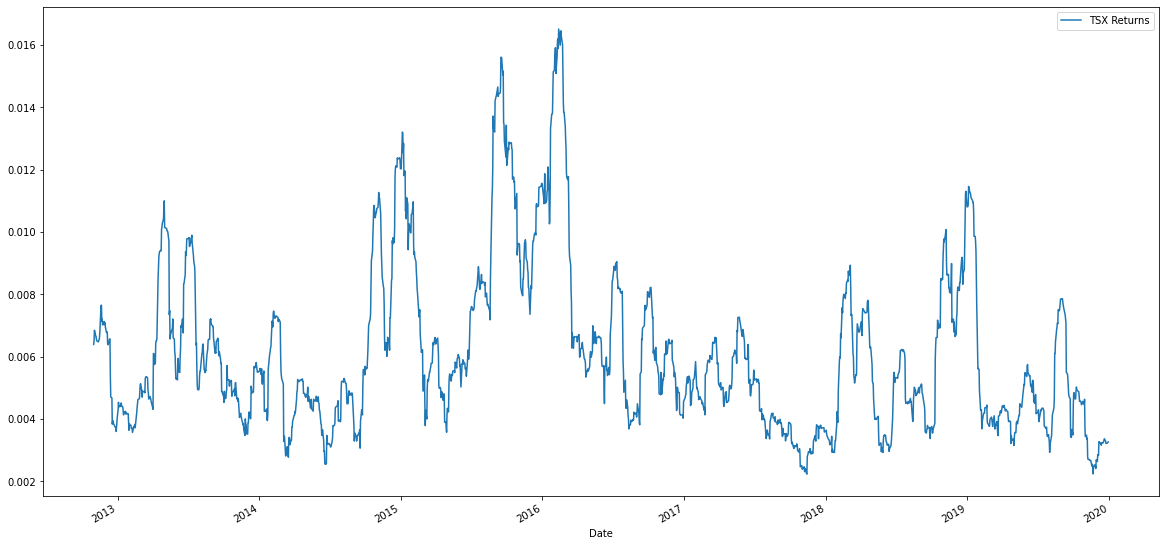

In [47]:
#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
#Calculate rolling std deviation.
whale_std_21 = whale_df.rolling(21).std()
algo_std_21 = algo_df.rolling(21).std()
tsx_std_21 = tsx_df.rolling(21).std()

#Plot the rolling std deviation
whale_std_21.plot(figsize=(20,10))
algo_std_21.plot(figsize=(20,10))
tsx_std_21.plot(figsize=(20,10))

In [48]:
#Calculate and plot the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
all_data_corr = all_data.corr(method='pearson')
all_data_corr

,SOROS FUND MANAGEMENT LLC,PAULSON_AND_CO,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON_AND_CO,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
TSX Returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

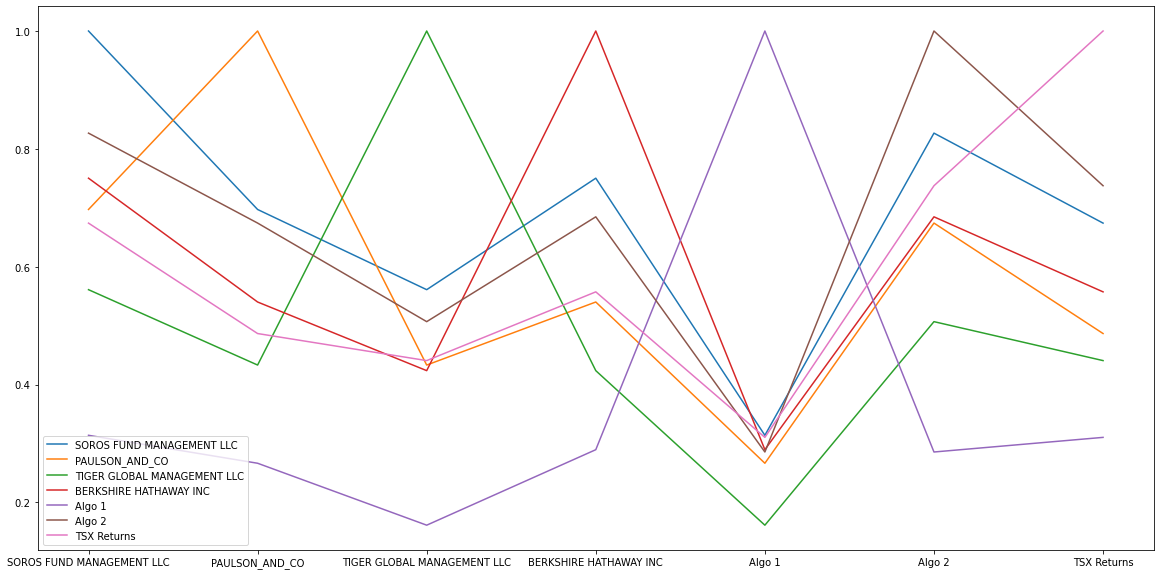

In [49]:
#Plot the correlation of each portfolio.
all_data_corr.plot(figsize=(20,10))

In [50]:
#From a visual analysis, it looks like Paulson & Co, Algorithm 2, or Berkshire have the strongest correlation.
#From the correlation dataframe results, we know that algorithm 2 has the strongest correlation to the TSX.

In [51]:
#Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.
#I will calculate and plot the beta between Algo 1 portfolio and the TSX because Algo 1 seems to have the highest returns.
#The formula used is 'Beta = covariance(asset return ,market return) / variance(market return)'
# Covariance of asset return and the market is 0.310276
# variance of the tsx is unknown.

In [52]:
#Isolate the selected data
algo1_tsx_df = all_data.iloc[:,-3:]
algo1_tsx_df = algo1_tsx_df.drop(['Algo 2'], axis=1)


In [53]:
#Find the Variance of the TSX
tsx_var = tsx_df.var()
tsx_rolling_var = tsx_df.rolling(60).var()
#Find the Covariance of algo 1 and the TSX
covariance_algo1_tsx = algo1_tsx_df.corr(method='pearson')
covariance_rolling_algo1_tsx = algo1_tsx_df.rolling(60).corr(method='pearson')

In [54]:
tsx_var
covariance_algo1_tsx

,Algo 1,TSX Returns
Algo 1,1.000000,0.310276
TSX Returns,0.310276,1.000000


In [55]:
#Calculate Beta
beta_algo1_tsx = covariance_algo1_tsx / tsx_var
beta_algo1_tsx

,Algo 1,TSX Returns
Algo 1,NaN,7042.994510
TSX Returns,NaN,22699.114626


<AxesSubplot:title={'center':'60 Day Rolling Beta For Algorithm 1 Vs The TSX Returns'}, xlabel='Date,None'>

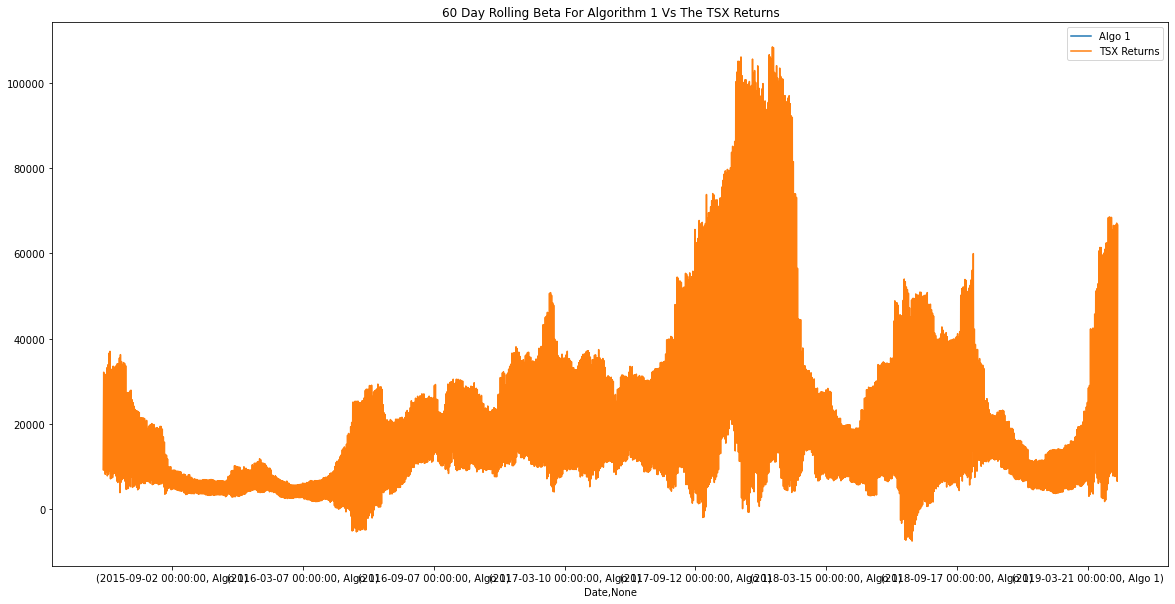

In [56]:
#Calculate and plot rolling Beta 
rolling_beta_algo1_tsx = covariance_rolling_algo1_tsx / tsx_rolling_var
#Plot the rolling beta. The organge space between the two lines is the difference between the two portfolios.
rolling_beta_algo1_tsx.plot(figsize=(20,10), title="60 Day Rolling Beta For Algorithm 1 Vs The TSX Returns")

### Sharpe Ratios

<AxesSubplot:>

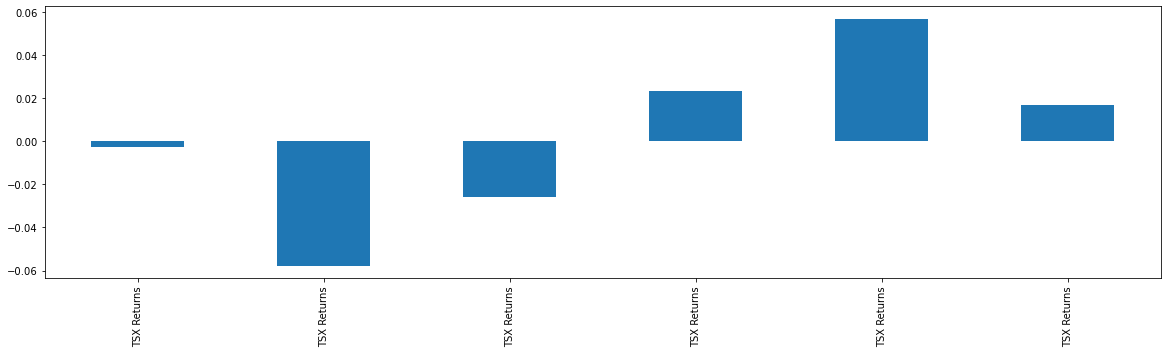

In [57]:
#Use the daily returns to calculate the Sharpe ratios.
#Assume that the TSX rate of return is the risk free rate.
#sharpe ratio = mean return of the portfolio less the risk free rate / standard deviation of the portfolio
soros_annual_sharpe = ((whale_df['SOROS FUND MANAGEMENT LLC'].mean() - tsx_df.mean())/ soros_std)
paulson_annual_sharpe = ((whale_df['PAULSON_AND_CO'].mean() - tsx_df.mean())/ paulson_std)
tiger_annual_sharpe = ((whale_df['TIGER GLOBAL MANAGEMENT LLC'].mean() - tsx_df.mean())/ tiger_std)
berkshire_annual_sharpe = ((whale_df['BERKSHIRE HATHAWAY INC'].mean() - tsx_df.mean())/ berkshire_std)
algo_1_annual_sharpe = ((algo_df['Algo 1'].mean() - tsx_df.mean())/ algo_1_std)
algo_2_annual_sharpe = ((algo_df['Algo 2'].mean() - tsx_df.mean())/ algo_2_std)

#Use concat to join all the sharpe ratios
all_sharpe_ratios = pd.concat([soros_annual_sharpe, paulson_annual_sharpe, tiger_annual_sharpe, berkshire_annual_sharpe, algo_1_annual_sharpe, algo_2_annual_sharpe])

#Use a bor plot to plot the sharpe ratios
all_sharpe_ratios.plot.bar(figsize=(20,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.



The sharpe ratio tells us whether or not a particular portfolio has a higher return in proportion to the amount of risk that is taken with any particular investment. 
In the case of Algorithm 1, we can see that it has the highest sharpe ratio of just below 0.6. In comparison, Berkshire Hathaway's sharpe ratio is approximately 0.2.
This tells us that algorithm 1 returns more profit with less risk than Berkshire Hathaway's portfolio.
Algorithm 2 has a lower sharpe ratio than Berkshire Hathaway however.
All the other Whale portfolios do not perform nearly as well as Berkshire Hathaway and therefore are irrlevant in this analysis.

# Custom Portfolio

In [58]:
#Use the Google Finance function to choose a portfolio. (see Five_stock_portfolio.cs to see the work completed)

#Download the data needed as CSV files and calculate the portfolio returns.
custom_portfolio = pd.read_csv('Five_stock_portfolio.csv')

#Set the first column as the header
new_header = custom_portfolio.iloc[0] #grab the first row for the header
custom_portfolio = custom_portfolio[1:] #take the data less the header row
custom_portfolio.columns = new_header #set the header row as the df header

#check to see if it is imported correctly.
custom_portfolio.head()

,Date,Facebook Close,Tesla Close,Tilray Close,Amazon Close,Shopify Close
1,03/03/2015,79.6,39.91,4.81,384.61,32.34
2,04/03/2015,80.9,40.49,4.75,382.72,32.14
3,05/03/2015,81.21,40.13,5.94,387.83,31.6
4,06/03/2015,80.01,38.78,5.8,380.09,31.65
5,09/03/2015,79.44,38.18,5.69,378.56,31.79


In [59]:
#Add the portfolio returns to the DataFrame with the other portfolios, then analyze and compare all portfolios.

#Cleaning the data
#check data type
custom_portfolio.dtypes

#Change closing prices to floats
custom_portfolio['Facebook Close'] = custom_portfolio['Facebook Close'].astype(float)
custom_portfolio['Tesla Close'] = custom_portfolio['Tesla Close'].astype(float)
custom_portfolio['Tilray Close'] = custom_portfolio['Tilray Close'].astype(float)
custom_portfolio['Amazon Close'] = custom_portfolio['Amazon Close'].astype(float)
custom_portfolio['Shopify Close'] = custom_portfolio['Shopify Close'].astype(float)

#Change date to date_time format
custom_portfolio['Date']= pd.to_datetime(custom_portfolio['Date'])

#change closing price to percent change.
facebook_pct_change = custom_portfolio['Facebook Close'].pct_change()
tesla_pct_change = custom_portfolio['Tesla Close'].pct_change()
tilray_pct_change = custom_portfolio['Tilray Close'].pct_change()
amazon_pct_change = custom_portfolio['Amazon Close'].pct_change()
shopify_pct_change = custom_portfolio['Shopify Close'].pct_change()

#Make new columns for the Percent change
custom_portfolio['Facebook Returns'] = facebook_pct_change
custom_portfolio['Tesla Returns'] = tesla_pct_change
custom_portfolio['Tilray Returns'] = tilray_pct_change
custom_portfolio['Amazon Returns'] = amazon_pct_change
custom_portfolio['Shopify Returns'] = shopify_pct_change

#Delete closing price columns
custom_portfolio = custom_portfolio.drop(['Facebook Close','Tesla Close','Amazon Close','Shopify Close','Tilray Close'], axis=1)

#Set date as index
custom_portfolio = custom_portfolio.set_index('Date')

In [60]:
custom_portfolio.head()

,Facebook Returns,Tesla Returns,Tilray Returns,Amazon Returns,Shopify Returns
Date,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN
2015-04-03,0.016332,0.014533,-0.012474,-0.004914,-0.006184
2015-05-03,0.003832,-0.008891,0.250526,0.013352,-0.016801
2015-06-03,-0.014777,-0.033641,-0.023569,-0.019957,0.001582
2015-09-03,-0.007124,-0.015472,-0.018966,-0.004025,0.004423


In [61]:
#Check for null values
custom_portfolio.isna().sum()

0
Facebook Returns    1
Tesla Returns       1
Tilray Returns      1
Amazon Returns      1
Shopify Returns     1
dtype: int64

In [62]:
#drop null values
custom_portfolio = custom_portfolio.dropna()

In [63]:
#check that null values are gone.
custom_portfolio.isna().sum()

0
Facebook Returns    0
Tesla Returns       0
Tilray Returns      0
Amazon Returns      0
Shopify Returns     0
dtype: int64

### Financial analysis

<AxesSubplot:xlabel='Date'>

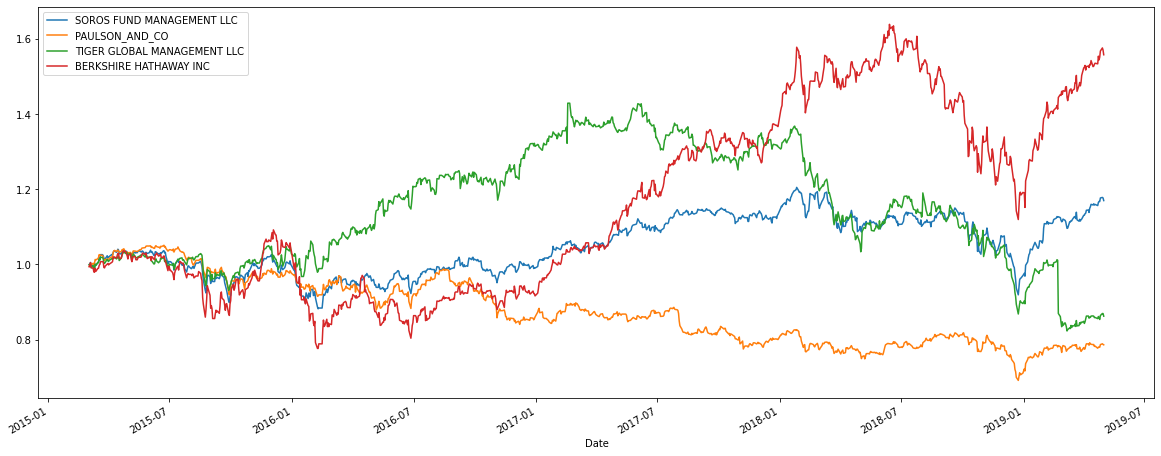

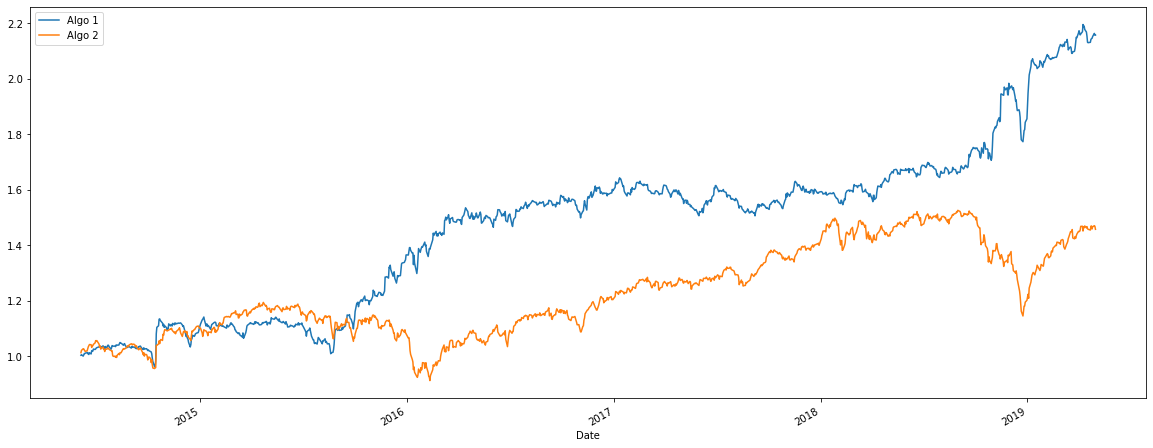

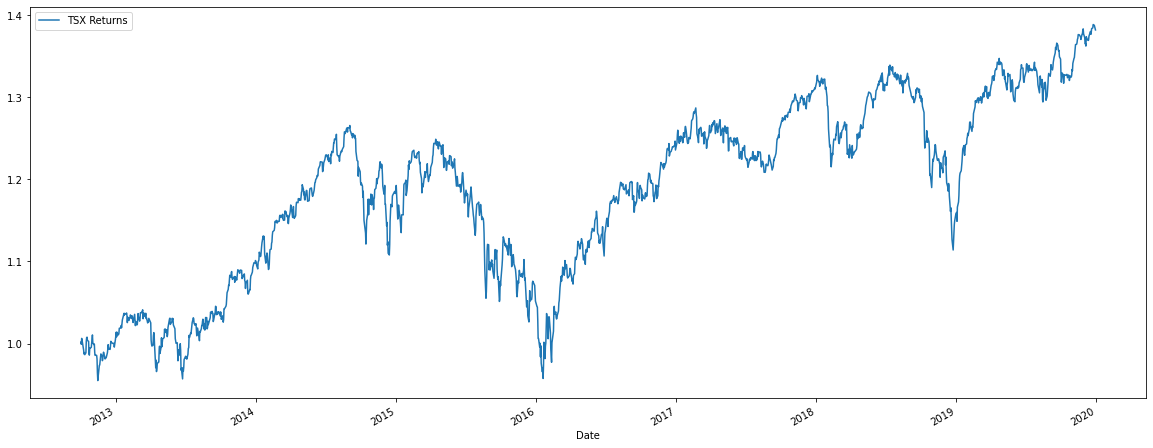

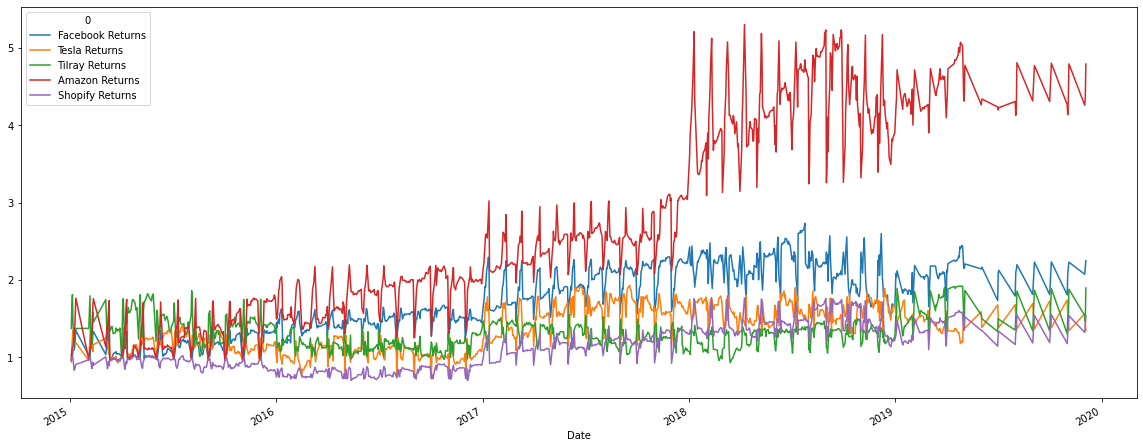

In [64]:
#Calculate Cumulative returns.
# Calculate cumulative returns of all portfolios
whale_cumulative_returns_df = (1 + whale_df).cumprod()
algo_cumulative_returns_df = (1 + algo_df).cumprod()
tsx_cumulative_returns_df = (1 + tsx_df).cumprod()
custom_portfolio_cumulative_returns = (1 + custom_portfolio).cumprod()

# Plot cumulative returns
whale_cumulative_returns_df.plot(figsize =(20,8))
algo_cumulative_returns_df.plot(figsize =(20,8))
tsx_cumulative_returns_df.plot(figsize =(20,8))
custom_portfolio_cumulative_returns.plot(figsize =(20,8))

In [80]:
#Calculate the standard deviation of the portfolio
facebook_std = custom_portfolio['Facebook Returns'].std()
tesla_std = custom_portfolio['Tesla Returns'].std()
tilray_std = custom_portfolio['Tilray Returns'].std()
amazon_std = custom_portfolio['Amazon Returns'].std()
shopify_std = custom_portfolio['Shopify Returns'].std()

#Calculate the sharpe ratios
facebook_annual_sharpe = ((custom_portfolio['Facebook Returns'].mean() - tsx_df.mean())/ facebook_std)
tesla_annual_sharpe = ((custom_portfolio['Tesla Returns'].mean() - tsx_df.mean())/ tesla_std)
tilray_annual_sharpe = ((custom_portfolio['Tilray Returns'].mean() - tsx_df.mean())/ tilray_std)
amazon_annual_sharpe = ((custom_portfolio['Amazon Returns'].mean() - tsx_df.mean())/ amazon_std)
shopify_annual_sharpe = ((custom_portfolio['Shopify Returns'].mean() - tsx_df.mean())/ shopify_std)

#Combine all sharpe ratios with even weight
all_custom_sharpe_ratio = facebook_annual_sharpe*tesla_annual_sharpe*tilray_annual_sharpe*amazon_annual_sharpe*shopify_annual_sharpe/5

In [81]:
all_custom_sharpe_ratio

TSX Returns    5.892984e-09
dtype: float64

<AxesSubplot:>

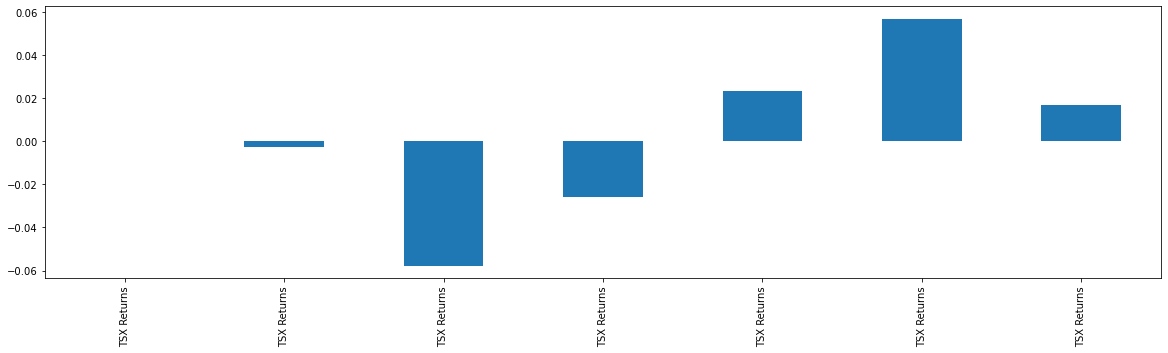

In [82]:
#Use concat to join all the sharpe ratios
all_sharpe_ratios = pd.concat([all_custom_sharpe_ratio,soros_annual_sharpe, paulson_annual_sharpe, tiger_annual_sharpe, berkshire_annual_sharpe, algo_1_annual_sharpe, algo_2_annual_sharpe])

#Use a bor plot to plot the sharpe ratios
all_sharpe_ratios.plot.bar(figsize=(20,5))

### Summary

The sharpe ratio of the custom portfolio is very close to zero, meaning it would not beat the returns of any of the portfolios that have positive returns. 